In [89]:
"""
Code to check the extragalatic foreground power spectra (radio, dust DG-Po/DG-Cl, and tSZ) obtained 
(A) by scaling different components using G15 values (solid lines)
vs
(B) actual best-fit lines from George et al. 2015 (https://arxiv.org/pdf/1408.3161.pdf)
"""

'\nCode to check the extragalatic foreground power spectra (radio, dust DG-Po/DG-Cl, and tSZ) obtained \n(A) by scaling different components using G15 values (solid lines)\nvs\n(B) actual best-fit lines from George et al. 2015 (https://arxiv.org/pdf/1408.3161.pdf)\n'

In [90]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['figure.dpi'] = 150
rcParams["figure.facecolor"] = 'white'
try:
    import os
    rc('text.latex',preamble=r'\usepackage{%s/apjfonts}' %(str(os.getcwd())))
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import argparse, sys, numpy as np, scipy as sc, warnings, os
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/tools/')
#or look into https://github.com/sriniraghunathan/tools
import flatsky, tools, misc
import ilc, foregrounds as fg

#import matplotlib.cbook
warnings.filterwarnings('ignore',category=RuntimeWarning)
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

In [92]:
#some constants
h=6.62607004e-34 #Planck constant in m2 kg / s
k_B=1.38064852e-23 #Boltzmann constant in m2 kg s-2 / K-1
Tcmb = 2.73 #Kelvin


In [93]:
#params
freqarr = [95, 150, 220]
paramfile = 'params.ini'

#same as Fig.3 of G15 https://arxiv.org/pdf/1408.3161.pdf
ymin, ymax = 0.5, 1e3
xmin, xmax = 2e3, 12e3

#get the colours for different frequencies
colorarr = [cm.jet(int(d)) for d in np.linspace(0, 255, len(freqarr)**2)]
colordic = {}
cntr = 0
for freq1 in sorted(freqarr):
    for freq2 in sorted(freqarr):
        if (freq2, freq1) in colordic: colordic[(freq1,freq2)] = colordic[(freq2,freq1)]
        colordic[(freq1,freq2)] = colorarr[cntr]
        cntr += 1

In [94]:
# read and store param dict
param_dict = misc.fn_get_param_dict(paramfile)
el = np.arange(param_dict['lmax'])

Text(0.5, 1.0, 'Radio')

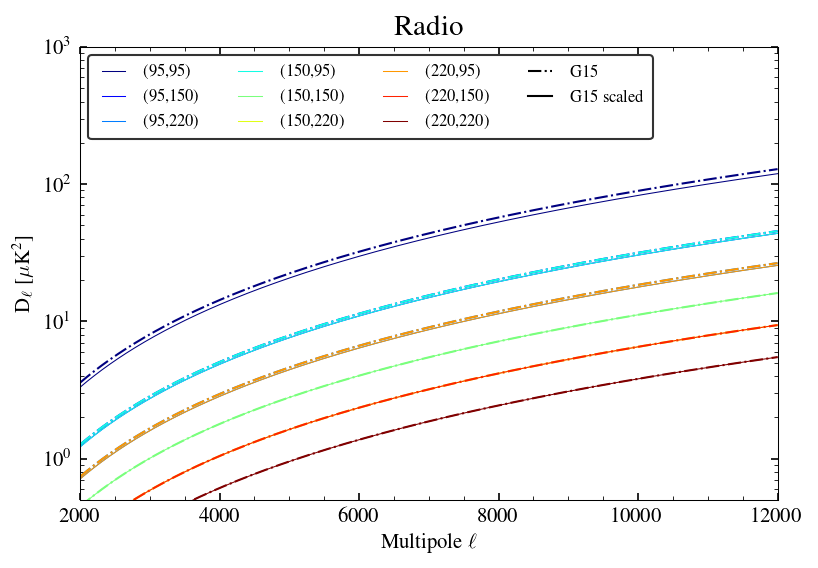

In [95]:
#Radio galaxies
ax = subplot(111, yscale = 'log')
for iter in range(2):
    for freq1 in sorted(freqarr):
        for freq2 in sorted(freqarr):
            if iter == 0:
                lsval = '-'
                lwval = 0.5
                labval = r'(%s,%s)' %(freq1, freq2)
                el, cl = fg.get_cl_radio(freq1, freq2, freq0 = param_dict['freq0'], fg_model = param_dict['fg_model'], spec_index_rg = param_dict['spec_index_rg'])
            else:
                lsval = '-.'
                labval = None#'(%s,%s): G15' %(freq1, freq2)
                lwval = 1.
                try:
                    el, cl = fg.get_foreground_power_spt('RG', freq1 = freq1, freq2 = freq2)
                except:
                    el, cl = fg.get_foreground_power_spt('RG', freq1 = freq2, freq2 = freq1)
            
            dl_fac = el * (el+1) / 2/ np.pi

            plot(el, cl * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)])
plot([], [], 'k-.', label = r'G15')
plot([], [], 'k-', label = r'G15 scaled')
xlim(xmin, xmax)
ylim(ymin, ymax)
xlabel(r'Multipole $\ell$'); ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
legend(loc = 2, ncol = 4, fontsize = 8)
title(r'Radio', fontsize = 14)

<Figure size 900x600 with 0 Axes>

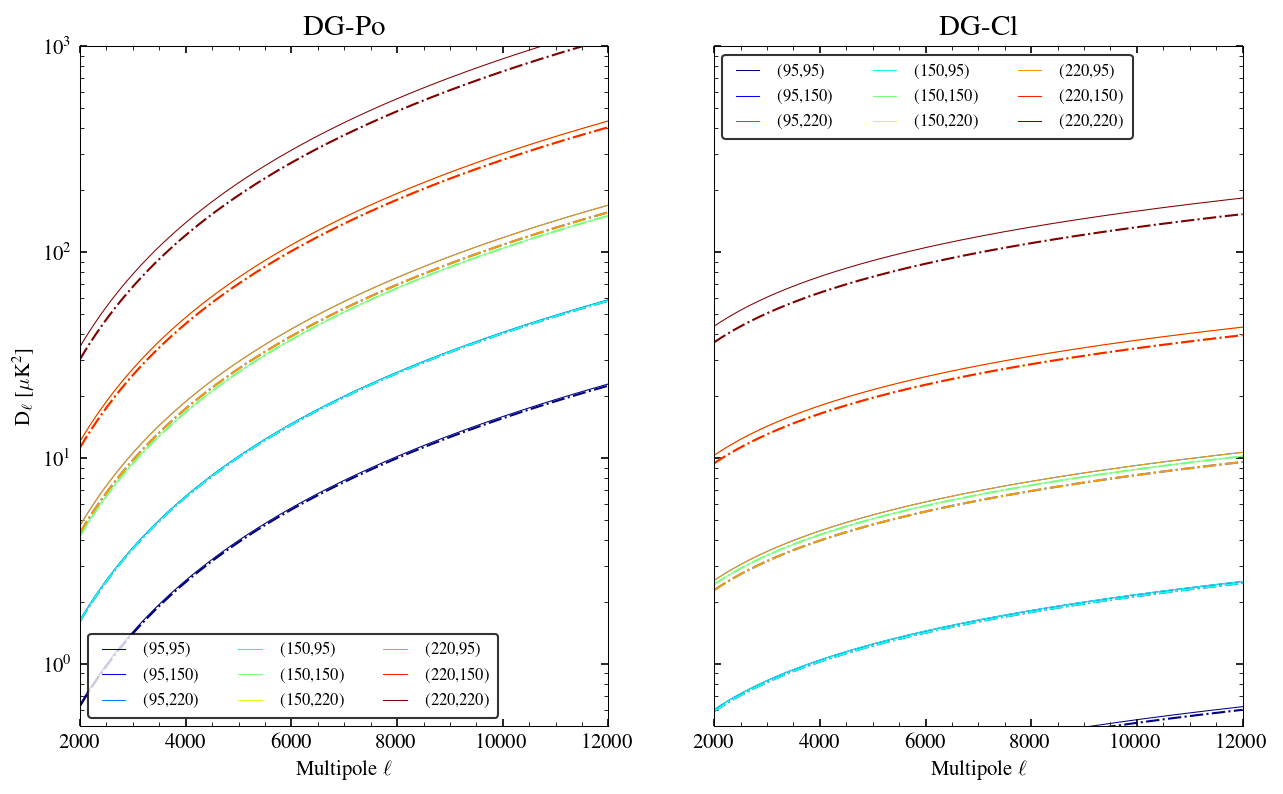

In [96]:
#DG galaxies
clf()
fig = figure(figsize=(10., 6.))
for fgcntr in range(2): #DG-Po, DG-Cl
    ax =subplot(1,2,fgcntr+1, yscale = 'log')
    for iter in range(2):
        for freq1 in sorted(freqarr):
            for freq2 in sorted(freqarr):
                if iter == 0:
                    lsval = '-'
                    lwval = 0.5
                    labval = r'(%s,%s)' %(freq1, freq2)
                    el,  cl_dg_po, cl_dg_clus = fg.get_cl_dust(freq1, freq2, freq0 = param_dict['freq0'], fg_model = param_dict['fg_model'], spec_index_dg_po = param_dict['spec_index_dg_po'], spec_index_dg_clus = param_dict['spec_index_dg_clus'], Tcib = param_dict['Tcib'])
                else:
                    lsval = '-.'
                    #labval = '(%s,%s): G15' %(freq1, freq2)
                    labval = None
                    lwval = 1.
                    try:
                        el, cl_dg_po = fg.get_foreground_power_spt('DG-Po', freq1 = freq1, freq2 = freq2)
                        el, cl_dg_clus = fg.get_foreground_power_spt('DG-Cl', freq1 = freq1, freq2 = freq2)
                    except:
                        el, cl_dg_po = fg.get_foreground_power_spt('DG-Po', freq1 = freq2, freq2 = freq1)
                        el, cl_dg_clus = fg.get_foreground_power_spt('DG-Cl', freq1 = freq2, freq2 = freq1)

                dl_fac = el * (el+1) / 2/ np.pi

                if fgcntr == 0:                    
                    plot(el, cl_dg_po * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)])
                else:
                    plot(el, cl_dg_clus * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)])
    
    if fgcntr == 0:
        tit = 'DG-Po'
        legend(loc = 3, ncol = 3, fontsize = 8)
    else:
        tit = 'DG-Cl'
        legend(loc = 2, ncol = 3, fontsize = 8)
    title(r'%s' %(tit), fontsize = 14)
    xlim(xmin, xmax)
    ylim(ymin, ymax)
    xlabel(r'Multipole $\ell$');
    plot([], [], 'k-.', label = r'G15')
    plot([], [], 'k-', label = r'G15 scaled')
    if fgcntr == 0:
        ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)


Text(0.5, 1.0, 'tSZ')

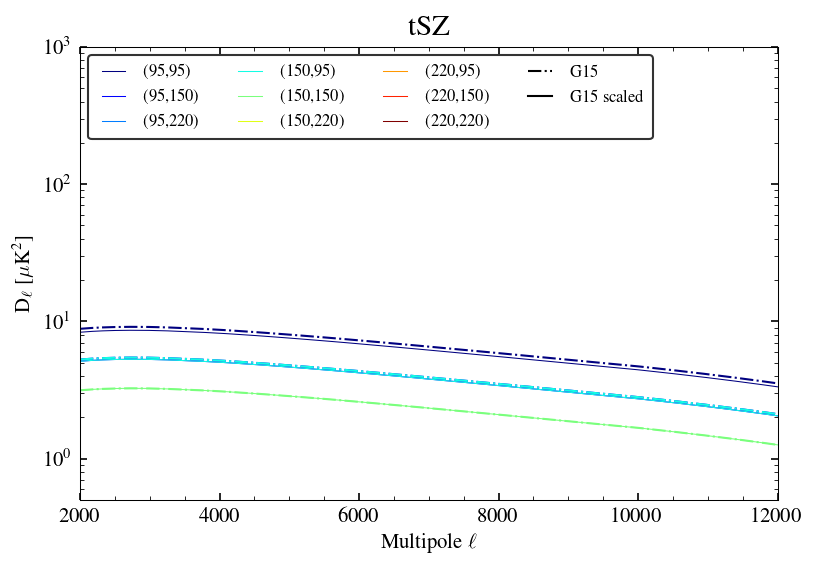

In [97]:
#tSZ
ax = subplot(111, yscale = 'log')
for iter in range(2):
    for freq1 in sorted(freqarr):
        for freq2 in sorted(freqarr):
            if iter == 0:
                lsval = '-'
                lwval = 0.5
                labval = r'(%s,%s)' %(freq1, freq2)
                el, cl = fg.get_cl_tsz(freq1, freq2, freq0 = param_dict['freq0'], fg_model = param_dict['fg_model'])
            else:
                lsval = '-.'
                labval = None#'(%s,%s): G15' %(freq1, freq2)
                lwval = 1.
                try:
                    el, cl = fg.get_foreground_power_spt('tSZ', freq1 = freq1, freq2 = freq2)
                except:
                    el, cl = fg.get_foreground_power_spt('tSZ', freq1 = freq2, freq2 = freq1)
            
            dl_fac = el * (el+1) / 2/ np.pi

            plot(el, cl * dl_fac, ls = lsval, lw = lwval, label = labval, color = colordic[(freq1, freq2)])
plot([], [], 'k-.', label = r'G15')
plot([], [], 'k-', label = r'G15 scaled')
xlim(xmin, xmax)
ylim(ymin, ymax)
xlabel(r'Multipole $\ell$'); ylabel(r'D$_{\ell}\ [\mu {\rm K}^{2}]$')
legend(loc = 2, ncol = 4, fontsize = 8)
title(r'tSZ', fontsize = 14)